# 주택 데이터셋

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
!pip install --upgrade mlxtend
# 머신러닝과 데이터 분석을 위한 다양한 도구들을 제공

  Using cached mlxtend-0.23.1-py3-none-any.whl.metadata (7.3 kB)
Using cached mlxtend-0.23.1-py3-none-any.whl (1.4 MB)


In [3]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

In [4]:
df_corr = df.corr()
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [5]:
# CRIM: 도시의 인당 범죄율
# ZN: 2만 5,000평방 피트가 넘는 주택 비율
# INDUS: 도시에서 소매 업종이 아닌 지역 비율
# CHAS: 찰스 강 인접 여부(강 주변 = 1, 그 외 = 0)
# NOX: 일산화질소 농도(10ppm당)
# RM: 주택의 평균 방 개수
# AGE: 1940년 이전에 지어진 자가 주택 비율
# DIS: 다섯 개의 보스턴 고용 센터까지 가중치가 적용된 거리
# RAD: 방사형으로 뻗은 고속도로까지 접근성 지수
# TAX: 10만 달러당 재산세율
# PTRATIO: 도시의 학생-교사 비율
# B: 1000(Bk - 0.63)2, 여기서 Bk는 도시의 아프리카계 미국인 비율
# LSTAT: 저소득 계층의 비율
# MEDV: 자가 주택의 중간 가격(1,000달러 단위)

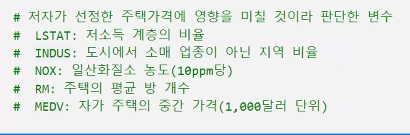

In [6]:
cols = ['LSTAT','INDUS','NOX','RM','MEDV']

In [7]:
df[cols]

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2
...,...,...,...,...,...
501,9.67,11.93,0.573,6.593,22.4
502,9.08,11.93,0.573,6.120,20.6
503,5.64,11.93,0.573,6.976,23.9
504,6.48,11.93,0.573,6.794,22.0


In [8]:
df[cols].values

array([[ 4.98 ,  2.31 ,  0.538,  6.575, 24.   ],
       [ 9.14 ,  7.07 ,  0.469,  6.421, 21.6  ],
       [ 4.03 ,  7.07 ,  0.469,  7.185, 34.7  ],
       ...,
       [ 5.64 , 11.93 ,  0.573,  6.976, 23.9  ],
       [ 6.48 , 11.93 ,  0.573,  6.794, 22.   ],
       [ 7.88 , 11.93 ,  0.573,  6.03 , 11.9  ]])

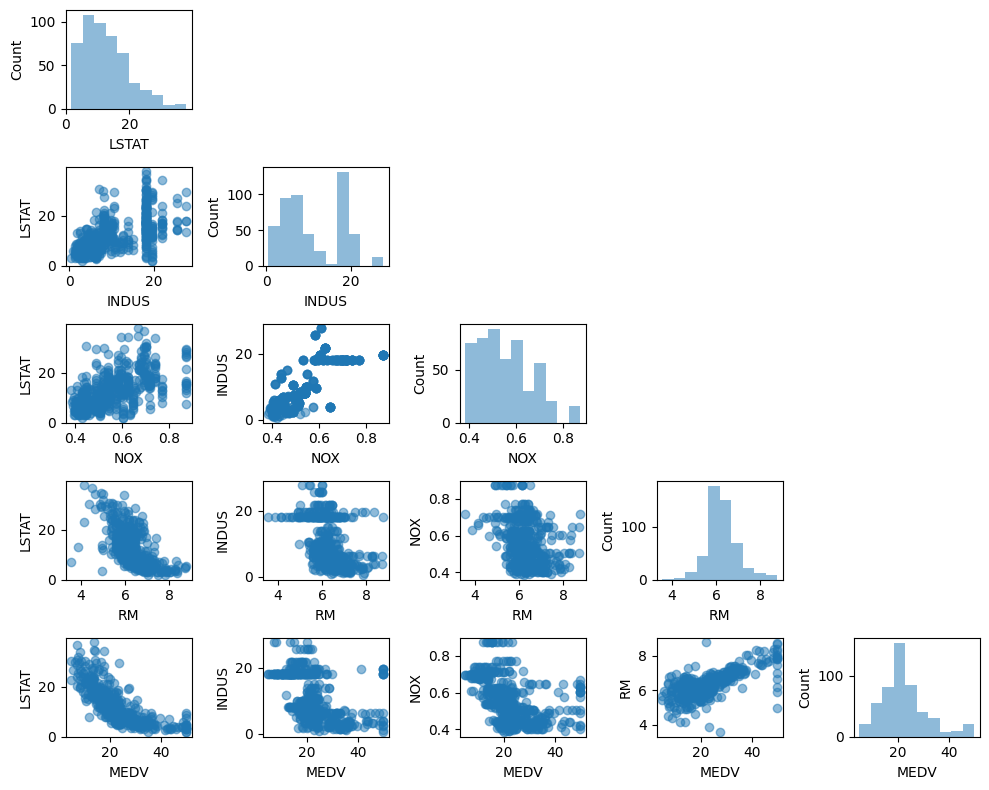

In [9]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10, 8),
                  names=cols, alpha=0.5)
plt.tight_layout()
# 플롯의 레이아웃을 자동으로 조정하여 플롯들이 서로 겹치지 않도록 한다

# plt.savefig('images/10_03.png', dpi=300)
plt.show()

# ['MEDV']['RM']의 상관계수 구하기

In [10]:
df_corr['MEDV']['RM']

np.float64(0.6953599470715401)

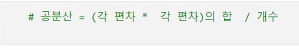

In [11]:
import numpy as np
np.cov(df['RM'],df['MEDV'])

# np.cov(m, y=None, rowvar=True, bias=False, ddof=None)
# 공분산 행렬을 계산
# 주어진 데이터에서 각 변수 간의 공분산을 계산
# 공분산이란 두 변수 간의 상관관계

array([[ 0.49367085,  4.49344588],
       [ 4.49344588, 84.58672359]])

In [12]:
# 공분산

# 두 변수 간의 선형 관계를 측정하는 통계적 지표
# 두 변수의 값이 함께 증가하거나 감소하는 정도를 나타낸다

In [13]:
# 공분산 = 4.49344588

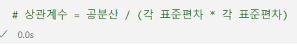

In [14]:
4.49344588 / ((df['RM'].std()) * (df['MEDV'].std()))

np.float64(0.6953599471420316)

In [15]:
4.49344588 / ((np.std(df['RM'])) * (np.std(df['MEDV'])))
# np.std 함수는 기본적으로 모집단 표준편차를 계산합니다. 즉, 분모를 n으로 사용합니다.

np.float64(0.6967368975324119)

In [16]:
np.corrcoef(df['RM'],df['MEDV'])

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

<Axes: >

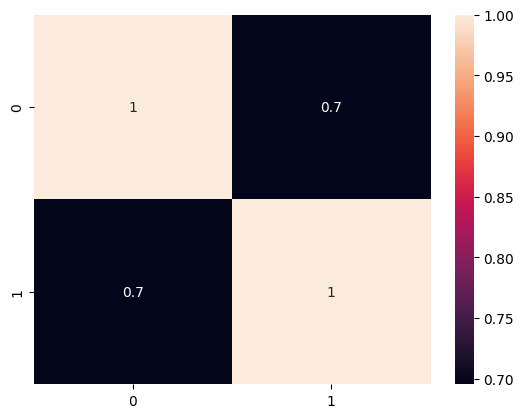

In [17]:
import seaborn as sns
sns.heatmap(np.corrcoef(df['RM'],df['MEDV']),
            annot=True)

In [18]:
# 표준화 전 상관 계수: 0.6953599470715401

In [19]:
# 스케일링(표준화) 후 방개수와 집값(중간값)의 상관계수 구하기

In [20]:
medv_mean = df['MEDV'].mean()
rm_mean = df['RM'].mean()

In [21]:
# df['RM'] 편차
df['MEDV'] - medv_mean

0       1.467194
1      -0.932806
2      12.167194
3      10.867194
4      13.667194
         ...    
501    -0.132806
502    -1.932806
503     1.367194
504    -0.532806
505   -10.632806
Name: MEDV, Length: 506, dtype: float64

In [22]:
# class sklearn.preprocessing.StandardScaler(
    # *,
# copy=True,
# with_mean=True,
# with_std=True
# [source]

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()

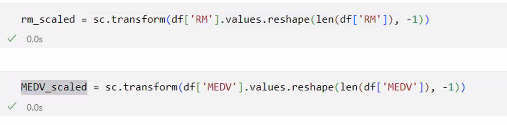

In [25]:
sc.fit(df)

StandardScaler()

In [26]:
np.corrcoef(df[cols].values)

array([[1.        , 0.9538042 , 0.98085792, ..., 0.89604805, 0.8783535 ,
        0.55163629],
       [0.9538042 , 1.        , 0.94993372, ..., 0.93995987, 0.94230298,
        0.74823318],
       [0.98085792, 0.94993372, 1.        , ..., 0.95346872, 0.93605964,
        0.63022304],
       ...,
       [0.89604805, 0.93995987, 0.95346872, ..., 1.        , 0.99764226,
        0.82491155],
       [0.8783535 , 0.94230298, 0.93605964, ..., 0.99764226, 1.        ,
        0.8593221 ],
       [0.55163629, 0.74823318, 0.63022304, ..., 0.82491155, 0.8593221 ,
        1.        ]])

In [27]:
np.corrcoef(df[cols].values.T)

array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827, -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585, -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819, -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        ,  0.69535995],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995,  1.        ]])

In [28]:
from mlxtend.plotting import heatmap

In [29]:
cml = np.corrcoef(df[cols].values)

In [30]:
# heatmap(cml)

# 경사 하강법으로 회귀 모델의 파라미터 구하기

In [31]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)

In [32]:
X = df[['RM']].values
# 이중 대괄호 - 2차원 배열 유지
y = df['MEDV'].values
# 단일 대괄호 - 1차원 배열 반환

In [33]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)

y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
# y값을 표준화하고, 다시 1차원 배열로 변환
# y는 기본적으로 1차원 배열
# y[:, np.newaxis] y를 2차원 배열로 반환
# flatten() 1차원 배열로 변환하는 메서드

In [34]:
# y를 일시적으로 2차원 배열로 바꿨다가 다시 1차원 배열로 되돌리는 이유

# fit_transform 데이터를 특징 행렬로 받아들인다
# 즉 항상 2차원 배열이어야 한다
# 이렇게 스케일링 작업을 마친 후에는 다시 1차원으로 변환
# 나중에 계산이나 처리를 용이하게 한다

In [35]:
sc_y.fit_transform(y.reshape(len(y),-1)).ravel()
# reshape(len(y), -1) 렌 와이는 와이의 길이, -1은 자동으로 차원을 맞춤
# ravel() 다차원 배열을 1차원 배열로 평탄화

array([ 0.15968566, -0.10152429,  1.32424667,  1.18275795,  1.48750288,
        0.6712218 ,  0.03996443,  0.49708184, -0.65659542, -0.39538548,
       -0.81985164, -0.39538548, -0.09064054, -0.23212926, -0.47157171,
       -0.286548  ,  0.06173193, -0.54775795, -0.25389676, -0.47157171,
       -0.97222411, -0.31919924, -0.79808414, -0.87427038, -0.75454915,
       -0.93957286, -0.64571167, -0.84161913, -0.44980422, -0.16682677,
       -1.07017784, -0.87427038, -1.0157591 , -1.02664285, -0.98310786,
       -0.39538548, -0.27566425, -0.16682677,  0.23587189,  0.89978051,
        1.34601416,  0.4426631 ,  0.30117438,  0.23587189, -0.14505928,
       -0.35185049, -0.27566425, -0.64571167, -0.88515413, -0.34096674,
       -0.30831549, -0.22124551,  0.26852314,  0.09438317, -0.39538548,
        1.4004329 ,  0.23587189,  0.98685049,  0.08349942, -0.31919924,
       -0.41715297, -0.71101416, -0.0362218 ,  0.26852314,  1.13922296,
        0.10526692, -0.34096674, -0.0579893 , -0.55864169, -0.17

In [36]:
lr = LinearRegressionGD()
# 경량화된 선형 회귀 모델 구현
# 경사 하강법(gradient descent)을 사용
lr.fit(X_std, y_std)

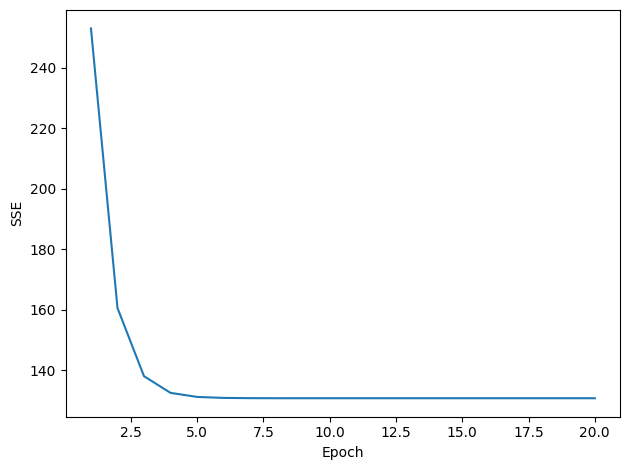

In [37]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
# 플롯의 레이아웃을 자동으로 조정하여 서브플롯 간의 간격을 적절히 맞추는데 사용

# plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [38]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

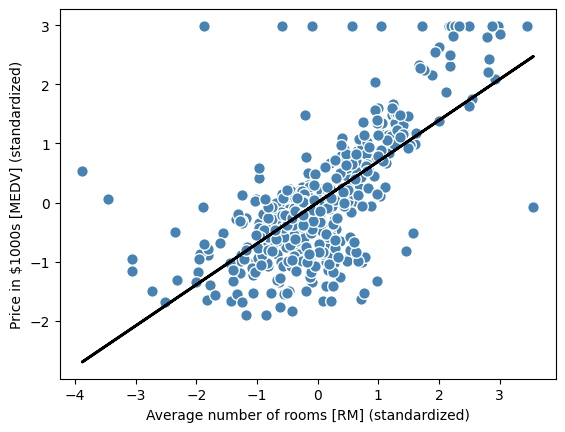

In [39]:
lin_regplot(X_std, y_std, lr)
# 선형 회귀선을 포함한 산점도
# 데이터와 함께 선형 회귀선을 시각화
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

# plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [40]:
print('기울기: %.3f' % lr.w_[1])
print('절편: %.3f' % lr.w_[0])

기울기: 0.695
절편: -0.000


In [41]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
# np.array([[5.0]]) 2차원 배열, 하나의 샘플에 대한 특성값을 나타냄
price_std = lr.predict(num_rooms_std)
print("$1,000 단위 가격: %.3f" % sc_y.inverse_transform(price_std.reshape(-1,1)))

$1,000 단위 가격: 10.840


C:\Users\acy\AppData\Local\Temp\ipykernel_6644\2598261248.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("$1,000 단위 가격: %.3f" % sc_y.inverse_transform(price_std.reshape(-1,1)))


# RANSAC을 사용하여 안정된 회귀 모델 훈련

In [42]:
# RANSAC(RANdom SAmple Consensus) 
# 전체 데이터 세트의 인라이어 하위 집합에서
# 매개 변수를 강력하게 추정하기 위한 반복 알고리즘

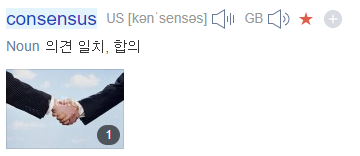

In [43]:
from sklearn.linear_model import RANSACRegressor

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
slr = LinearRegression()

In [46]:
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100, # 최대 시도 횟수
                         min_samples=50, # 최소 샘플 수
                         loss='absolute_error', # 손실 함수
                         # squared_error
                         residual_threshold=5.0,
                        #  잔차(residual)
                        #  표본(sample)으로 추정한 회귀식과 실제 관측값의 차이
                         # 잔차의 임계값
                         # 이 값보다 큰 잔차를 이상치로 간주
                         random_state=0)

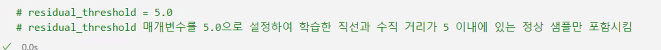

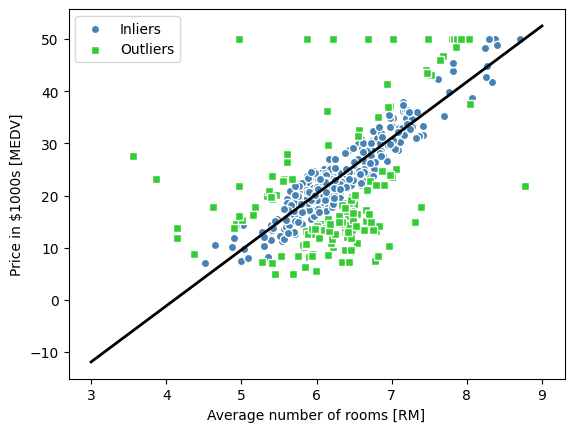

In [47]:
ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

# plt.savefig('images/10_08.png', dpi=300)
plt.show()

In [48]:
# LinearRegression
# 기울기: 9.102
# 절편: -34.671

In [49]:
print('기울기: %.3f' % ransac.estimator_.coef_[0])
print('절편: %.3f' % ransac.estimator_.intercept_)

기울기: 10.735
절편: -44.089


# 선형 회귀 모델의 성능 평가

In [50]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [51]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

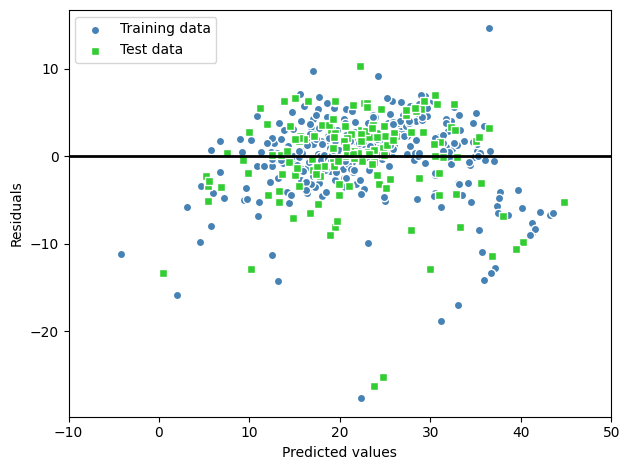

In [52]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

In [53]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 19.958, 테스트 MSE: 27.196
훈련 R^2: 0.765, 테스트 R^2: 0.673


In [54]:
# 회귀 모델의 정확도를 높이는 과정

# 단순 선형
# >> 다중이나 다항, 규제를 적용, DecisionTreeRegressor
# >> 앙상블(RandomForestRegressor)

# 회귀에 규제 적용

In [55]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [56]:
# 라쏘 적용 전

# 훈련 MSE: 19.958, 테스트 MSE: 27.196
# 훈련 R^2: 0.765, 테스트 R^2: 0.673

In [57]:
print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 20.926, 테스트 MSE: 28.876
훈련 R^2: 0.753, 테스트 R^2: 0.653


In [58]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [60]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# 선형 회귀 모델을 다항 회귀로 변환

In [61]:
X = np.array([258.0, 270.0, 294.0,
              320.0, 342.0, 368.0,
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8,
              298.6, 314.2, 342.2,
              360.8, 368.0, 391.2,
              390.8])

In [62]:
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

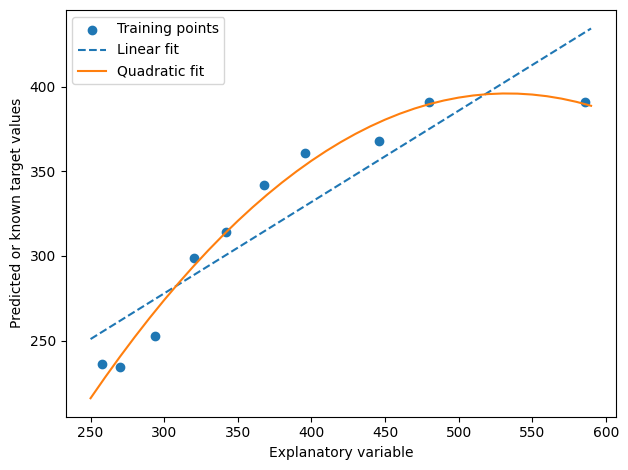

In [63]:
# 선형 특성 학습
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# 이차항 특성 학습
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# 결과 그래프
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/10_11.png', dpi=300)
plt.show()

In [64]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [65]:
print('훈련 MSE 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('훈련 R^2 비교 - 선형 모델: %.3f, 다항 모델: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

훈련 MSE 비교 - 선형 모델: 569.780, 다항 모델: 61.330
훈련 R^2 비교 - 선형 모델: 0.832, 다항 모델: 0.982


# 주택 데이터셋을 사용한 비선형 관계 모델링

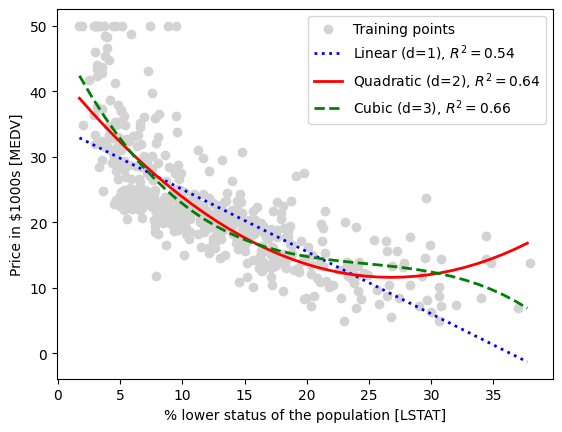

In [66]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# 이차, 삼차 다항식 특성을 만듭니다
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 학습된 모델을 그리기 위해 특성 범위를 만듭니다
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# 결과 그래프를 그립니다
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='Linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red',
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit,
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green',
         lw=2,
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

# plt.savefig('images/10_12.png', dpi=300)
plt.show()

# 결정 트리 회귀

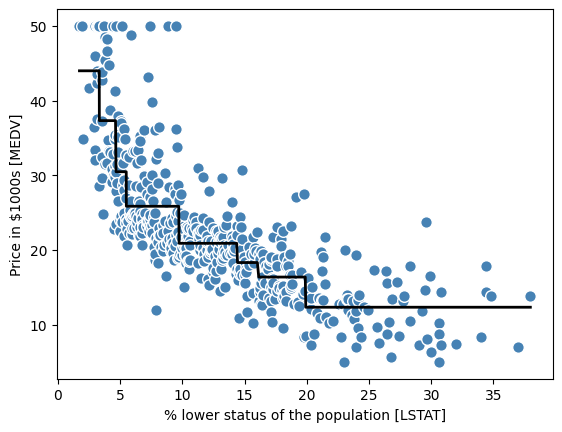

In [67]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
# plt.savefig('images/10_14.png', dpi=300)
plt.show()

# 랜덤 포레스트 회귀

In [68]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [69]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000,
                               criterion='squared_error',
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 1.644, 테스트 MSE: 11.085
훈련 R^2: 0.979, 테스트 R^2: 0.877


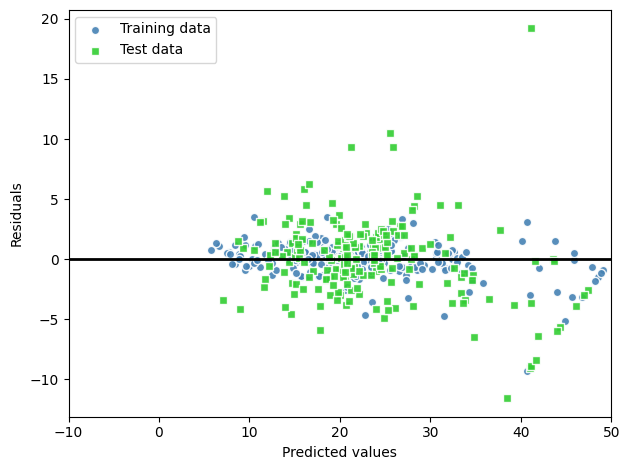

In [70]:
plt.scatter(y_train_pred,
            y_train_pred - y_train,
            c='steelblue',
            edgecolor='white',
            marker='o',
            s=35,
            alpha=0.9,
            label='Training data')
plt.scatter(y_test_pred,
            y_test_pred - y_test,
            c='limegreen',
            edgecolor='white',
            marker='s',
            s=35,
            alpha=0.9,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_15.png', dpi=300)
plt.show()